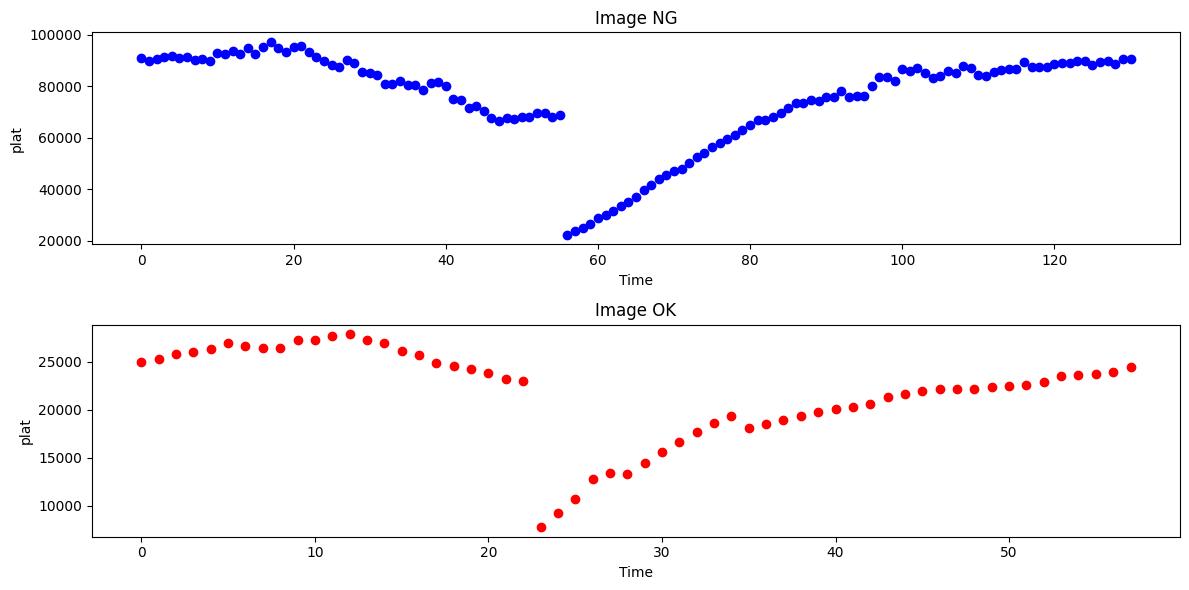

y =  -86.15444953705129 x +  24213.970777323204
R² =  0.08949480073790336
y =  -34.26598515987831 x +  77935.25086745317
R² =  0.004936705361278764


In [44]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
import csv
from scipy.stats import linregress
import pandas as pd


def process_images(path):
    time = 0
    time_list = []
    area_list = []
    
    for file in glob.glob(path):
        img = io.imread(file)
        if img.ndim == 3:
            img = img[:, :, 0]
        entropy_img = entropy(img, disk(22))
        thresh = threshold_otsu(entropy_img)
        binary = entropy_img >= thresh
        scratch_area = np.sum(binary == True)
        time_list.append(time)
        area_list.append(scratch_area)
        time += 1

                
    return time_list, area_list,entropy_img,binary

time_list_a, area_list_a,entropy_img_a,binary_a = process_images(path_a)
time_list_b, area_list_b,entropy_img_b,binary_b = process_images(path_b)


with open('csv_b.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile) 
    writer.writerow(['Time', 'Area'])
    for t, area in zip(time_list_b, area_list_b):
        writer.writerow([t, area])
        
data = {'Time': time_list_b, 'Area': area_list_b}
df = pd.DataFrame(data)
output_file = 'exel_b.xlsx'
df.to_excel(output_file, index=False)
            
path_a = "a/*.*"
path_b = "b/*.*"




plt.figure(figsize=(12, 6))





plt.subplot(2, 1, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(2, 1, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()
  
    
slope, intercept, rvalue, pvalue, std_err = linregress(time_list_b, area_list_b)

print ("y = ", slope,"x + ", intercept)
print("R² = ", rvalue ** 2)

slope, intercept, rvalue, pvalue, std_err = linregress(time_list_a, area_list_a)

print ("y = ", slope,"x + ", intercept)
print("R² = ", rvalue ** 2)


#Histogram based image segmentation in Python

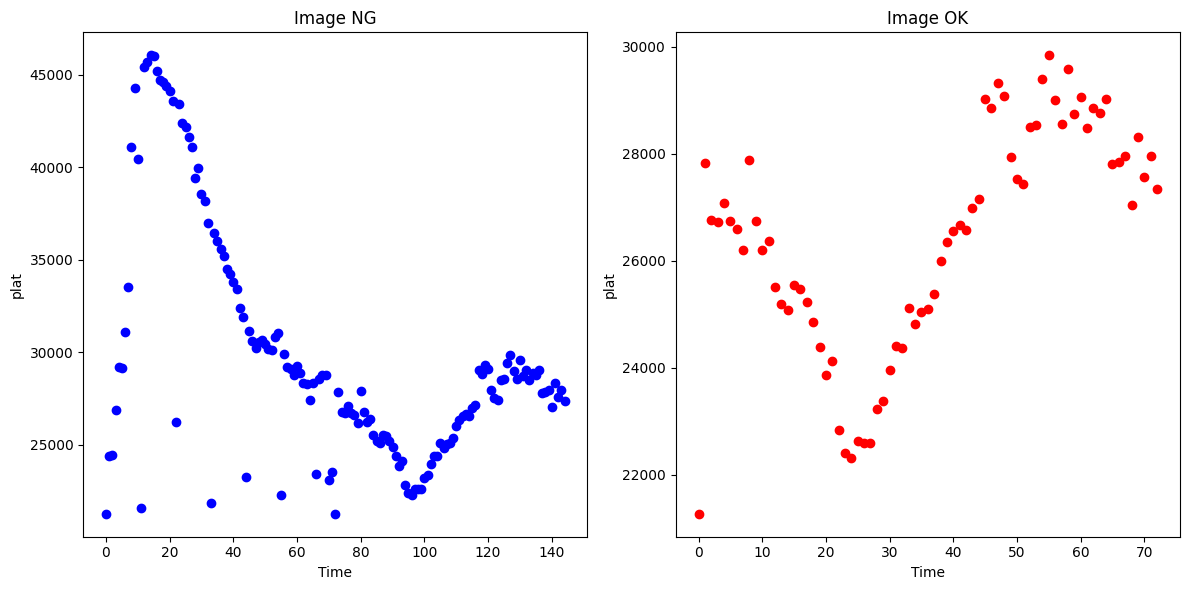

y =  -84.15000393638796 x +  35970.25545583373
R² =  0.3078074152304057


In [74]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
from scipy.stats import linregress
selem = np.array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1 ,1, 1, 1 ,1 ,1,1, 1, 1, 0],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0 ,1, 1, 1, 1],
 [1, 1, 1 ,1 ,1 ,0 ,1 ,1 ,1 ,1, 1],
 [0 ,1 ,1 ,1 ,1, 1, 1, 1, 1 ,1 ,0],
 [0, 1 ,1 ,1 ,1 ,1 ,1 ,1, 1, 1, 0],
 [0 ,0, 0, 1, 1, 1, 1, 1, 0, 0, 0]])


def process_images(path):
    time = 0
    time_list = []
    area_list = []
    
    for file in glob.glob(path):
        img = io.imread(file)
        if img.ndim == 3:
            img = img[:, :, 0]
        entropy_img = entropy(img, selem)
        thresh = threshold_otsu(entropy_img)
        binary = entropy_img <= thresh
        scratch_area = np.sum(binary == True)
        time_list.append(time)
        area_list.append(scratch_area)
        time += 1
    
    return time_list, area_list

path_a = "a/*.*"
path_b = "bb/*.*"

time_list_a, area_list_a = process_images(path_a)
time_list_b, area_list_b = process_images(path_b)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(1, 2, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()
  
    
slope, intercept, rvalue, pvalue, std_err = linregress(time_list_a, area_list_a)

print ("y = ", slope,"x + ", intercept)
print("R² = ", rvalue ** 2)


(224, 224)
(50176,)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] binary
4.435536635537257 thresh


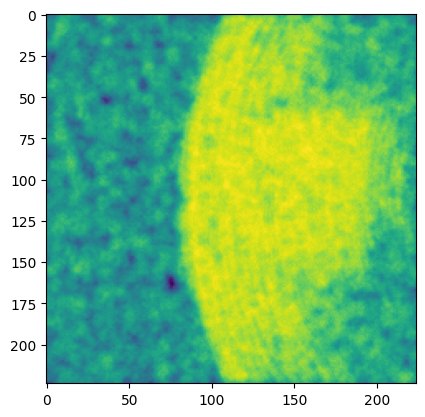

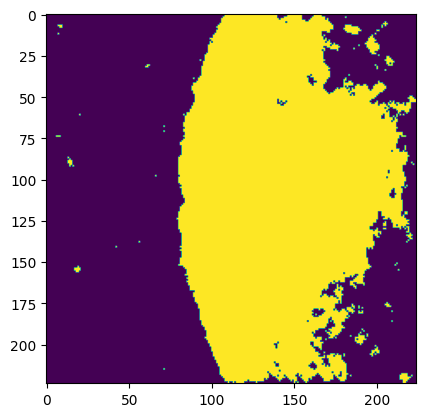

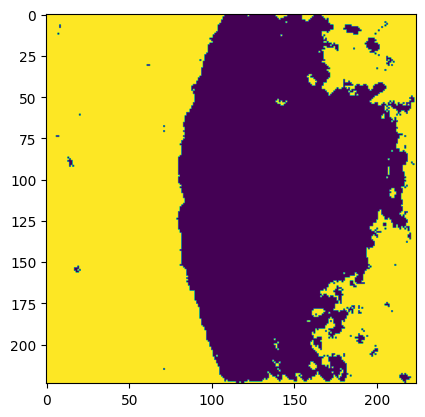

In [30]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
from scipy.stats import linregress


path = "aa/img_00007.jpg"


img = io.imread(path)
if img.ndim == 3:
    img = img[:, :, 0]
entropy_img = entropy(img, disk(22))
print(entropy_img.shape)
print((entropy_img.reshape((-1,))).shape)
img2 = entropy_img.reshape((-1,1))
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 2,covariance_type='tied').fit(img2)
gmm_label = gmm.predict(img2)
segmented = gmm_label.reshape(entropy_img.shape)

img2 = img.reshape(-1)



thresh = threshold_otsu(entropy_img)
binary = entropy_img >= thresh
scratch_area = np.sum(binary == True)
print(binary,'binary')
print(thresh,'thresh')
plt.imshow(entropy_img)
plt.show()
plt.imshow(binary)
plt.show()
plt.imshow(segmented)

In [10]:
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk

def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image <= threshold]
        background = gray_image[gray_image > threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        info_gain = total_entropy - (p_foreground * entropy_img[gray_image <= threshold].mean() +
                                     p_background * entropy_img[gray_image > threshold].mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image

# Example usage:
input_image = cv2.imread("aa/img_00007.jpg")
neighborhood = disk(22)
thresholded_image = entropy_threshold(input_image, neighborhood)

cv2.imshow('Original Image', input_image)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


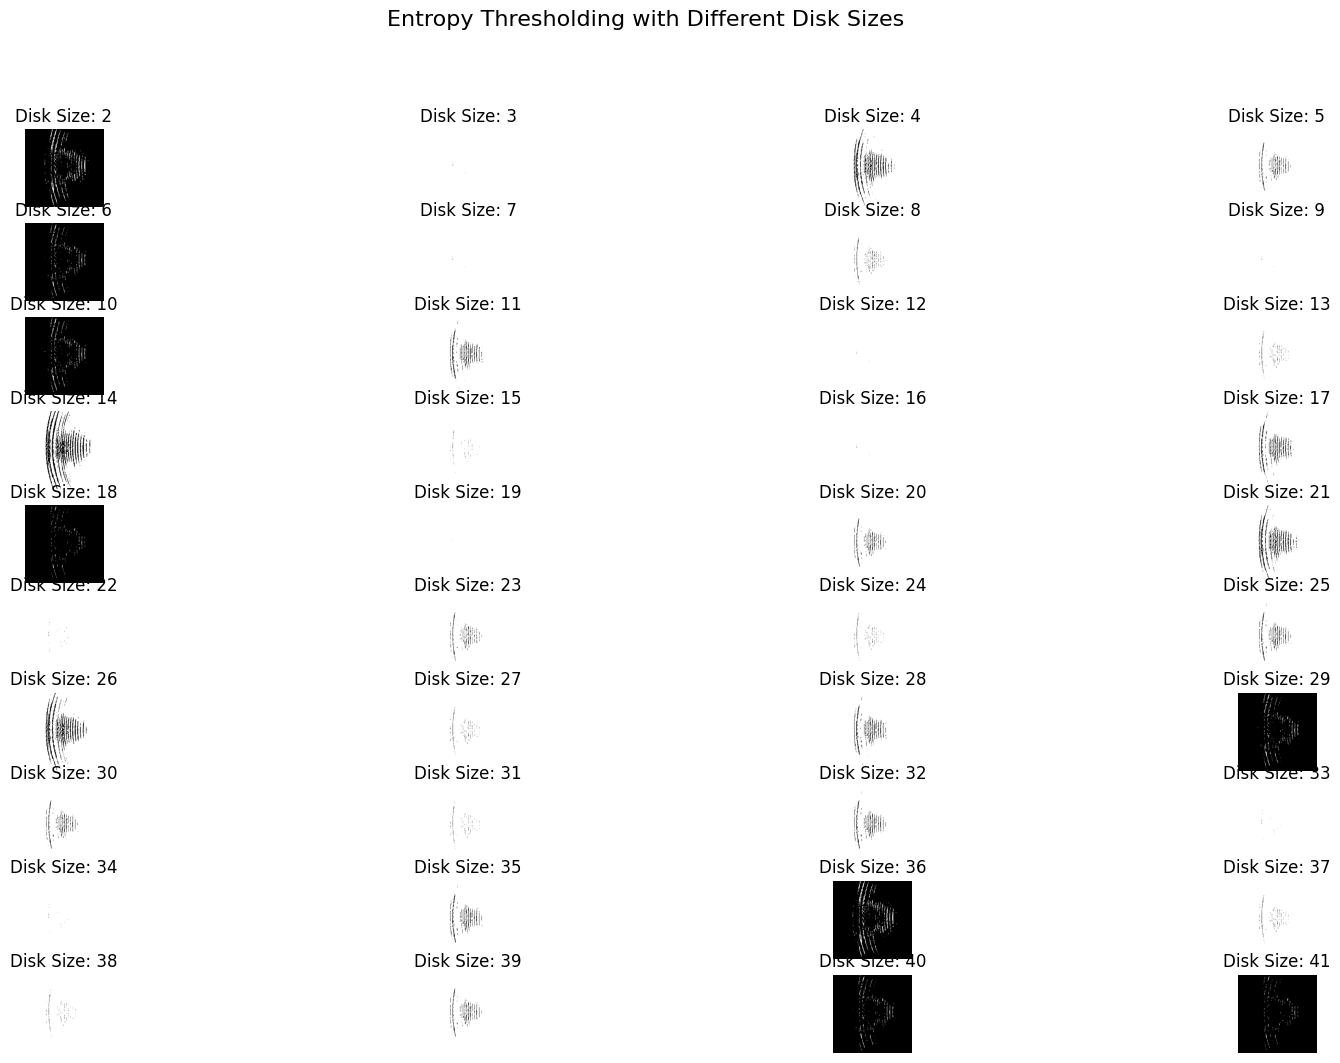

In [29]:
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt

def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image <= threshold]
        background = gray_image[gray_image > threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        info_gain = total_entropy - (p_foreground * entropy_img[gray_image <= threshold].mean() +
                                     p_background * entropy_img[gray_image > threshold].mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image

# Example usage:
input_image = cv2.imread("b/  (98).jpg")

fig, axes = plt.subplots(10, 4, figsize=(20, 12))
fig.suptitle('Entropy Thresholding with Different Disk Sizes', fontsize=16)

for ax, disk_size in zip(axes.ravel(), range(2, 42, 1)):
    neighborhood = disk(disk_size)
    thresholded_image = entropy_threshold(input_image, neighborhood)
    ax.imshow(thresholded_image, cmap='gray')
    ax.set_title(f'Disk Size: {disk_size}')
    ax.axis('off')

plt.show()


In [17]:
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk

def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image <= threshold]
        background = gray_image[gray_image > threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        info_gain = total_entropy - (p_foreground * entropy_img[gray_image <= threshold].mean() +
                                     p_background * entropy_img[gray_image > threshold].mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image

# Example usage:
input_image = cv2.imread("aa/img_00071.jpg")
neighborhood = disk(22)

thresholded_image = entropy_threshold(input_image, neighborhood)

cv2.imshow('Original Image', input_image)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


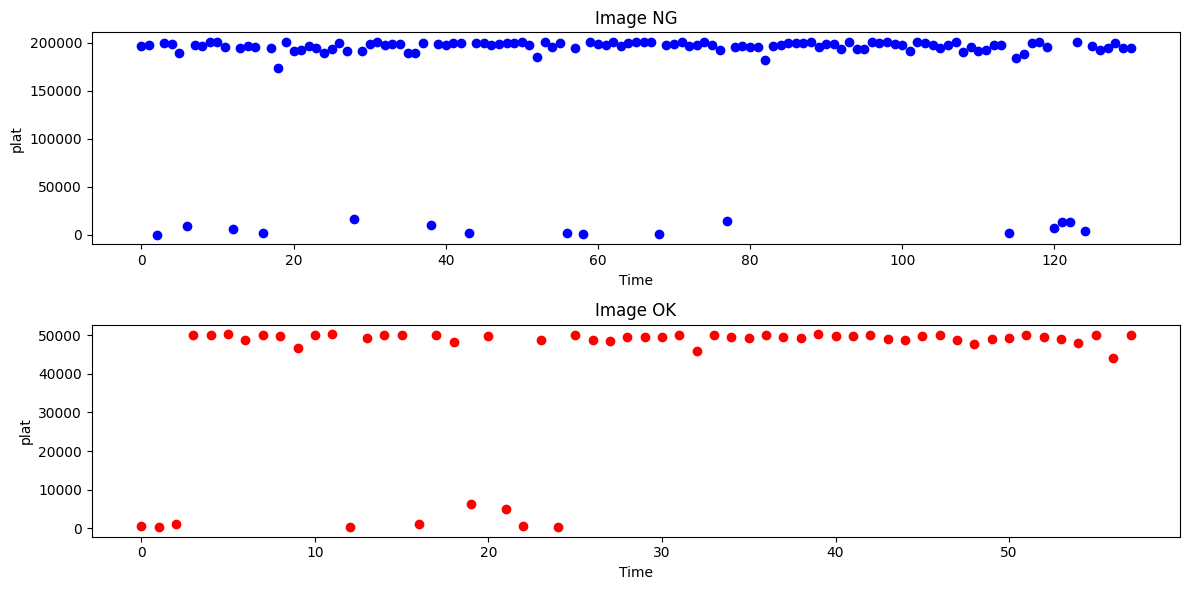

y =  399.50256851948694 x +  30523.607831677386
R² =  0.15023413539817257
y =  42.65491912667492 x +  170438.3310201249
R² =  0.0006669387618722074


In [23]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
import csv
from scipy.stats import linregress
import pandas as pd
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk


def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image >= threshold]
        background = gray_image[gray_image < threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        info_gain = total_entropy - (p_foreground * entropy_img[gray_image >= threshold].mean() +
                                     p_background * entropy_img[gray_image < threshold].mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image

def process_images(path):
    time = 0
    time_list = []
    area_list = []
    neighborhood = disk(22)
    
    for file in glob.glob(path):
        input_image = cv2.imread(file)
        
        thresholded_image = entropy_threshold(input_image, neighborhood)
        scratch_area = np.sum(thresholded_image == 255)
        time_list.append(time)
        area_list.append(scratch_area)
        time += 1

                
    return time_list, area_list

path_a = "a/*.*"
path_b = "b/*.*"

time_list_a, area_list_a = process_images(path_a)
time_list_b, area_list_b= process_images(path_b)


        
data = {'Time': time_list_b, 'Area': area_list_b}
df = pd.DataFrame(data)
output_file = 'exel_b.xlsx'
df.to_excel(output_file, index=False)
            





plt.figure(figsize=(12, 6))





plt.subplot(2, 1, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(2, 1, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()
  
    
slope, intercept, rvalue, pvalue, std_err = linregress(time_list_b, area_list_b)

print ("y = ", slope,"x + ", intercept)
print("R² = ", rvalue ** 2)

slope, intercept, rvalue, pvalue, std_err = linregress(time_list_a, area_list_a)

print ("y = ", slope,"x + ", intercept)
print("R² = ", rvalue ** 2)


C:\Users\ico\AppData\Local\Temp\ipykernel_7924\1114538870.py:45: RuntimeWarning: Mean of empty slice.
  background_entropy_mean = entropy_img[gray_image > threshold].mean()
C:\Users\ico\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


thresholded_image ==  [[255 255 255 ...   0   0 255]
 [255 255 255 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255   0]]
wave_area ==  24118


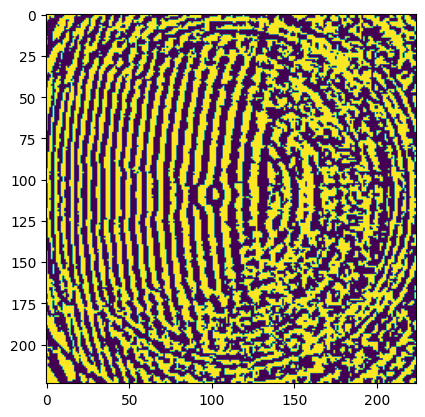

In [15]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob
import csv
from scipy.stats import linregress
import pandas as pd
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk


def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image >= threshold]
        background = gray_image[gray_image < threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        foreground_entropy_mean = entropy_img[gray_image <= threshold].mean()
        background_entropy_mean = entropy_img[gray_image > threshold].mean()

        info_gain = total_entropy - (p_foreground * foreground_entropy_mean +
                                     p_background * background_entropy_mean)

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.)

    return binary_image


input_image = cv2.imread("aa/img_00071.jpg")




neighborhood = disk(22)
thresholded_image = entropy_threshold(input_image, neighborhood)
scratch_area = np.sum(thresholded_image == 255)

print('thresholded_image == ', entropy_threshold(input_image, neighborhood))
print('wave_area == ',np.sum(thresholded_image == 255))
plt.imshow(thresholded_image)
plt.show()
